In [140]:
import pandas as pd

# Replace 'your_data_file.DATA' and 'your_csv_file.csv' with actual file paths
column_names = ["Age", "Work_class", "Final_Weight", "Education", "Education_Num", "Marital_Status", "Occupation", "Relationship",
                "Race", "Sex", "Capital_Gain", "Capital_Loss", "Hours_per_Week", "Native_Country", "Income"]

adult = pd.read_csv('F:\\IIT Platforms\\Second Year\\2 semester\\CM2604 Machine Learning\\Income-Prediction\\Dataset\\adult.data', delimiter=',', names=column_names)  # Adjust delimiter if needed
adult.to_csv('adult.csv', index=False)
adult_data = pd.read_csv("adult.csv")
adult_data.head(100)

,Age,Work_class,Final_Weight,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,29,Local-gov,115585,Some-college,10,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,50,United-States,<=50K
96,48,Self-emp-not-inc,191277,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,60,United-States,>50K
97,37,Private,202683,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,48,United-States,>50K
98,48,Private,171095,Assoc-acdm,12,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,England,<=50K


In [141]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Work_class      32561 non-null  object
 2   Final_Weight    32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Marital_Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  Hours_per_Week  32561 non-null  int64 
 13  Native_Country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [142]:
adult_data.nunique()

Age                  73
Work_class            9
Final_Weight      21648
Education            16
Education_Num        16
Marital_Status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_Gain        119
Capital_Loss         92
Hours_per_Week       94
Native_Country       42
Income                2
dtype: int64

In [143]:
# Print unique values for each column
for column in adult_data.columns:
    unique_values = adult_data[column].unique()
    print(f"{column} unique values:")
    print(unique_values)
    print("\n")

Age unique values:
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]


Work_class unique values:
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


Final_Weight unique values:
[ 77516  83311 215646 ...  34066  84661 257302]


Education unique values:
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


Education_Num unique values:
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


Marital_Status unique values:
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']


Occupation unique values:
[' Adm-clerical' ' Exec-managerial' ' Handler

In [144]:
# Replace '?' with NaN in the 'Work_class' column
adult_data['Work_class'].replace(' ?', pd.NA, inplace=True)

# Drop rows with NaN in the 'Work_class' column
adult_data = adult_data.dropna(subset=['Work_class'])

# Print unique values for the 'Work_class' column after removing '?'
print("Work_class unique values after removing '?':")
print(adult_data['Work_class'].unique())

Work_class unique values after removing '?':
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay' ' Never-worked']


In [145]:
# Replace '?' with NaN in the 'Occupation' column
adult_data['Occupation'].replace(' ?', pd.NA, inplace=True)

# Drop rows with NaN in the 'Occupation' column
adult_data = adult_data.dropna(subset=['Occupation'])

# Print unique values for the 'Occupation' column after removing '?'
print("Occupation unique values after removing '?':")
print(adult_data['Occupation'].unique())

Occupation unique values after removing '?':
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']


In [146]:
# Replace '?' with NaN in the 'Native_Country' column
adult_data['Native_Country'].replace(' ?', pd.NA, inplace=True)

# Drop rows with NaN in the 'Native_Country' column
adult_data = adult_data.dropna(subset=['Native_Country'])

# Print unique values for the 'Native_Country' column after removing '?'
print("Native_Country unique values after removing '?':")
print(adult_data['Native_Country'].unique())

Native_Country unique values after removing '?':
[' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Rico'
 ' Honduras' ' England' ' Canada' ' Germany' ' Iran' ' Philippines'
 ' Poland' ' Columbia' ' Cambodia' ' Thailand' ' Ecuador' ' Laos'
 ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic' ' El-Salvador'
 ' France' ' Guatemala' ' Italy' ' China' ' South' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']


In [147]:
# Calculate the mean of 'Capital_Loss' excluding 0 values
mean_capital_loss = adult_data[adult_data['Capital_Loss'] != 0]['Capital_Loss'].mean()

# Replace 0 values in 'Capital_Loss' with the calculated mean
adult_data['Capital_Loss'] = adult_data['Capital_Loss'].replace(0, mean_capital_loss)

# Print the mean value and updated 'Capital_Loss' column
print(f"Mean value of 'Capital_Loss' (excluding 0 values): {mean_capital_loss}")
print("\nUpdated 'Capital_Loss' column:")
print(adult_data['Capital_Loss'])
print(adult_data['Capital_Loss'].unique())

Mean value of 'Capital_Loss' (excluding 0 values): 1867.8983882270497

Updated 'Capital_Loss' column:
0        1867.898388
1        1867.898388
2        1867.898388
3        1867.898388
4        1867.898388
            ...     
32556    1867.898388
32557    1867.898388
32558    1867.898388
32559    1867.898388
32560    1867.898388
Name: Capital_Loss, Length: 30162, dtype: float64
[1867.89838823 2042.         1408.         1902.         1887.
 1719.         1762.         1564.         2179.         1816.
 1980.         1977.         1876.         1340.         2206.
 1741.         1485.         2339.         2415.         1380.
 1721.         2051.         2377.         1669.         2352.
 1672.          653.         2392.         1504.         1590.
 1651.         1628.         1848.         2001.         1740.
 2002.         1579.         2258.         1602.         2547.
 2205.         1726.         2444.         1138.         2238.
  625.          213.         1539.          880.  

In [148]:
# Calculate the mean of 'Capital_Gain' excluding 0 values
mean_capital_gain = adult_data[adult_data['Capital_Gain'] != 0]['Capital_Gain'].mean()

# Replace 0 values in 'Capital_Gain' with the calculated mean
adult_data['Capital_Gain'] = adult_data['Capital_Gain'].replace(0, mean_capital_gain)

# Print the mean value and updated 'Capital_Gain' column
print(f"Mean value of 'Capital_Gain' (excluding 0 values): {mean_capital_gain}")
print("\nUpdated 'Capital_Gain' column:")
print(adult_data['Capital_Gain'])
print(adult_data['Capital_Gain'].unique())


Mean value of 'Capital_Gain' (excluding 0 values): 12977.596926713948

Updated 'Capital_Gain' column:
0         2174.000000
1        12977.596927
2        12977.596927
3        12977.596927
4        12977.596927
             ...     
32556    12977.596927
32557    12977.596927
32558    12977.596927
32559    12977.596927
32560    15024.000000
Name: Capital_Gain, Length: 30162, dtype: float64
[ 2174.         12977.59692671 14084.          5178.
  5013.          2407.         14344.         15024.
  7688.          4064.          4386.          7298.
  1409.          3674.          1055.          2050.
  2176.           594.         20051.          6849.
  4101.          8614.          3411.          2597.
 25236.          4650.          2463.          3103.
 10605.          2964.          3325.          2580.
  3471.          4865.         99999.          6514.
  1471.          2329.          2105.          2885.
 10520.          2202.          2961.         27828.
  6767.          2228. 

In [149]:
adult_data.drop_duplicates()

,Age,Work_class,Final_Weight,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.000000,1867.898388,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,12977.596927,1867.898388,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,12977.596927,1867.898388,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,12977.596927,1867.898388,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,12977.596927,1867.898388,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,12977.596927,1867.898388,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,12977.596927,1867.898388,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,12977.596927,1867.898388,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,12977.596927,1867.898388,20,United-States,<=50K


In [150]:
adult_data.head(100)

,Age,Work_class,Final_Weight,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.000000,1867.898388,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,12977.596927,1867.898388,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,12977.596927,1867.898388,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,12977.596927,1867.898388,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,12977.596927,1867.898388,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,20,Private,188300,Some-college,10,Never-married,Tech-support,Own-child,White,Female,12977.596927,1867.898388,40,United-States,<=50K
104,29,Private,103432,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,12977.596927,1867.898388,40,United-States,<=50K
105,32,Self-emp-inc,317660,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7688.000000,1867.898388,40,United-States,>50K
107,30,Private,194901,11th,7,Never-married,Handlers-cleaners,Own-child,White,Male,12977.596927,1867.898388,40,United-States,<=50K


In [151]:
# Sort the DataFrame by the 'Age' column in ascending order
adult_data = adult_data.sort_values(by='Age')

# Display the sorted DataFrame
adult_data.head()

,Age,Work_class,Final_Weight,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Income
10180,17,Private,297246,11th,7,Never-married,Priv-house-serv,Own-child,White,Female,12977.596927,1867.898388,9,United-States,<=50K
21767,17,Private,207637,11th,7,Never-married,Handlers-cleaners,Own-child,White,Male,12977.596927,1867.898388,10,United-States,<=50K
14720,17,Private,99462,11th,7,Never-married,Other-service,Own-child,Amer-Indian-Eskimo,Female,12977.596927,1867.898388,20,United-States,<=50K
13322,17,Private,345403,10th,6,Never-married,Other-service,Own-child,White,Male,12977.596927,1867.898388,40,United-States,<=50K
26088,17,Private,225507,11th,7,Never-married,Handlers-cleaners,Not-in-family,Black,Female,12977.596927,1867.898388,15,United-States,<=50K


In [152]:
import pandas as pd

# Assuming you have already read the data into 'adult_data' DataFrame
missing_values = adult_data.isnull().sum()

print("Missing values in each column:")
print(missing_values)


Missing values in each column:
Age               0
Work_class        0
Final_Weight      0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_Gain      0
Capital_Loss      0
Hours_per_Week    0
Native_Country    0
Income            0
dtype: int64


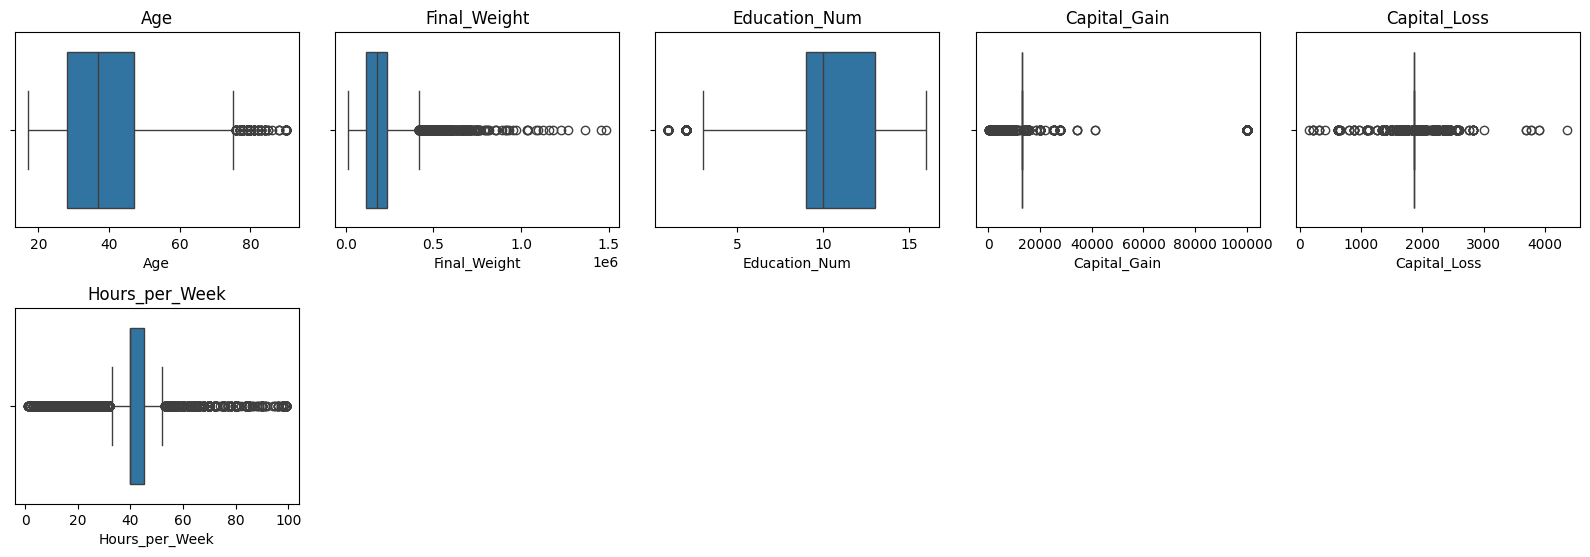

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already read the data into 'adult_data' DataFrame
column_names = ["Age", "Work_class", "Final_Weight", "Education", "Education_Num", "Marital_Status", "Occupation",
                "Relationship", "Race", "Sex", "Capital_Gain", "Capital_Loss", "Hours_per_Week", "Native_Country", "Income"]


# Extract numerical columns for box plot visualization
numerical_cols = adult_data.select_dtypes(include=['int64', 'float64']).columns

# Create box plots for numerical features
plt.figure(figsize=(16, 8))
for i, column in enumerate(numerical_cols, start=1):
    plt.subplot(3, 5, i)
    sns.boxplot(x=adult_data[column])
    plt.title(column)

plt.tight_layout()
plt.show()


In [154]:
# Display summary statistics
summary_stats = adult_data.describe()

# Calculate z-scores for numerical columns
z_scores = (adult_data[numerical_cols] - adult_data[numerical_cols].mean()) / adult_data[numerical_cols].std()

# Identify outliers using a threshold (e.g., z-score > 3 or < -3)
outliers = (z_scores > 3) | (z_scores < -3)

# Display the outliers
print("Outliers:")
print(outliers.sum())


Outliers:
Age               120
Final_Weight      322
Education_Num     196
Capital_Gain      153
Capital_Loss      509
Hours_per_Week    402
dtype: int64
